## Chapter 15: Recurrent networks 

# 15.4 Autoregressive modeling

Once we learn the general equation and properties of the line / hyperplane we can turn around and perform various learning tasks - like regression and classification - using it as a model.  By the same token now that we have a basic understanding of how to model general ordered data, we can use that model to perform various learning tasks leveraging that order.  In this Section we use the generic *recurrence relation* based dynamic system introduced in the previous Section to perform simple learning tasks on time series.  

In [102]:
## This code cell will not be shown in the HTML version of this notebook
# imports from custom library
import sys
sys.path.append('../../')
from mlrefined_libraries import math_optimization_library as optlib
from mlrefined_libraries import nonlinear_superlearn_library as nonlib
from mlrefined_libraries import recurrent_library as recurlib

# demos for this notebook
regress_plotter = nonlib.nonlinear_regression_demos
static_plotter = optlib.static_plotter.Visualizer()
basic_runner = nonlib.basic_runner
datapath = '../../mlrefined_datasets/recurrent_datasets/'

# import autograd functionality to bulid function's properly for optimizers
import autograd.numpy as np

# import timer
from datetime import datetime 
import copy
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<figure>
<p>
<img src= '../../mlrefined_images/recurrent_images/windowing_series.png' width="70%" height="70%" alt=""/>
</p>
<figcaption> <strong>Figure 1:</strong> <em> Graphical model representations of both fixed order (top panel) and variable order (bottom panel) dynamic systems.  In the former case when we 'roll back' the recursion we see - in the end - that every point in the system depends entirely on the system's initial condition(s).  Conversely with variable order systems *every preceeding input* plays a role in the value of its next step, and is embedded in the system.  
</em>
</figcaption>
</figure>

# load in and window data

In [103]:
csvname = datapath + 'ford_data.csv'
data = pd.read_csv(csvname)
x = np.array(data['Close'])[np.newaxis,:]    # date: 1980 to 2017

In [104]:
def window_series(x,order):
    # containers for input/output pairs
    x_in = []
    x_out = []
    T = x.size
    
    # window data
    for t in range(T - order):
        # get input sequence
        temp_in = x[:,t:t + order]
        x_in.append(temp_in)
        
        # get corresponding target
        temp_out = x[:,t + order]
        x_out.append(temp_out)
        
    # make array and cut out redundant dimensions
    x_in = np.array(x_in)
    x_in = x_in.swapaxes(0,1)[0,:,:].T
    x_out = np.array(x_out).T
    return x_in,x_out

In [147]:
x_in,x_out = window_series(x,order = 5)

# learn recursion

<IPython.core.display.Javascript object>


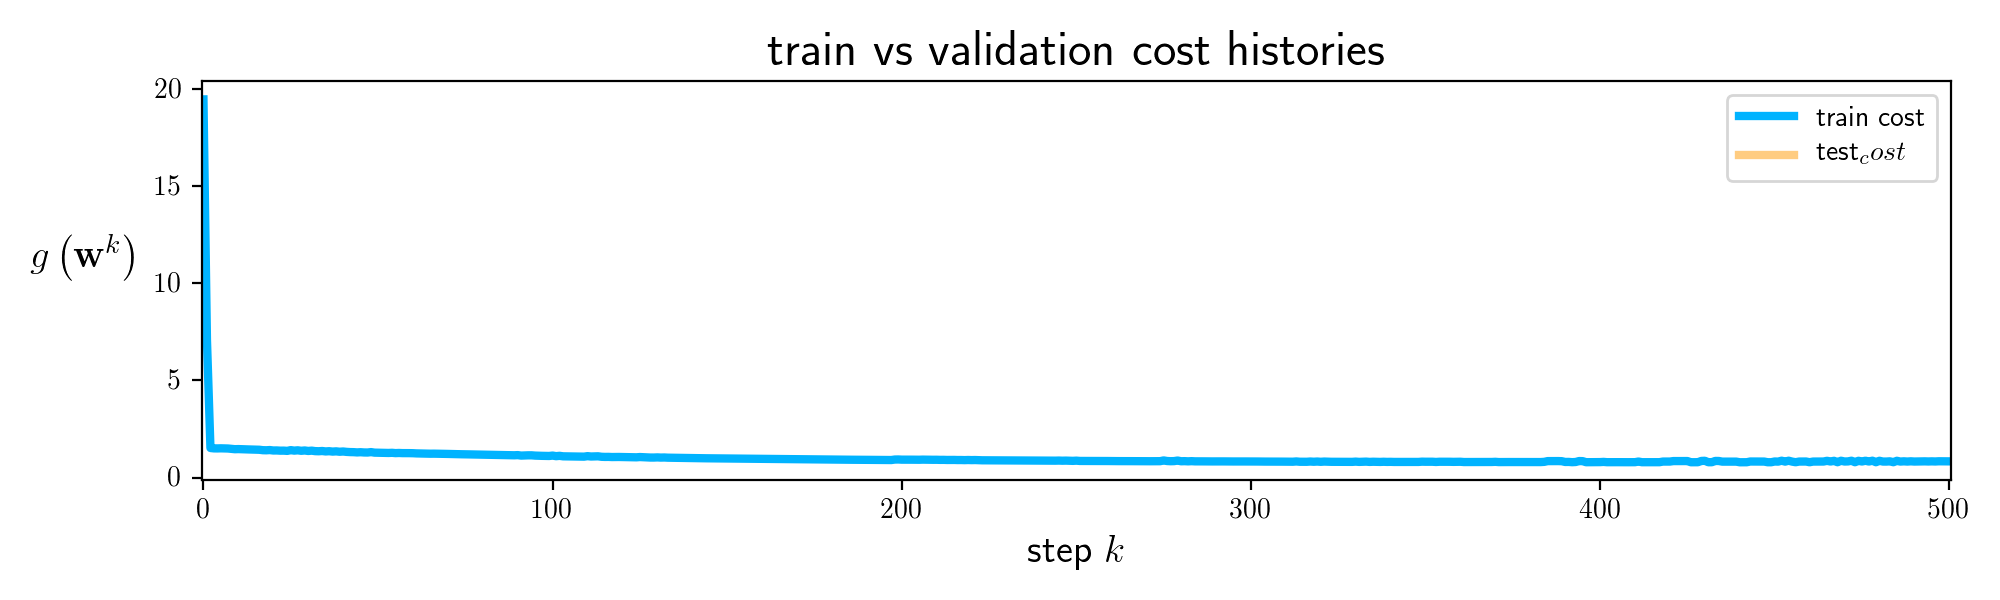

In [150]:
## This code cell will not be shown in the HTML version of this notebook
# import the v1 library
rnn_basics_lib = recurlib.RNN_basics_lib
mylib1 = rnn_basics_lib.superlearn_setup.Setup(x_in,x_out)

# choose dimensions of fully connected multilayer perceptron layers
layer_sizes = [10]
mylib1.choose_features(name = 'multilayer_perceptron',layer_sizes = layer_sizes,super_type = 'regression',activation = 'maxout',scale = 0.5)

# split into training and testing sets
mylib1.make_train_val_split(train_portion = 1)

# choose normalizer
mylib1.choose_normalizer(name = 'standard')

# choose cost
mylib1.choose_cost(name = 'least_absolute_deviations')

# fit an optimizationx
mylib1.fit(max_its = 500,alpha_choice = 10**(-3),batch_size = 100,verbose = False)

# plot cost history
mylib1.show_histories(start = 0,labels = ['run 1'])